# Learner Analysis



---

#### Compare the performances of various learners such as Decision Tree Learner, Random Tree Learner, and Bag Learner

## Table of contents:
[1) Train and evaluate a Decision Tree Learner](#first)

[2) Train and evaluate a Random Tree Learner](#second)

[3) Train and evaluate a Bag Learner](#third)

* [3a) Train and evaluate a Bag Learner by leaf size](#thirda)

* [3b) Train and evaluate a Bag Learner by bag size](#thirdb)

Import relevant libraries and modules

In [1]:
import warnings
import numpy as np
from analyze_learners_util import *
import DTLearner as dtl
import RTLearner as rtl
import BagLearner as bl
import matplotlib.pyplot as plt
%matplotlib inline

Read in a file, process it and split it into training and test sets

In [2]:
trainX, trainY, testX, testY = process_data("Data/Istanbul.csv", train_size=0.6)

Remove the header
Remove the non-numerical column (1st one)


Specifiy the max value of the leaf size range on which we train a tree learner, and the number of iterations per leaf size.

In [3]:
max_leaf_size = 200
num_iterations = 20

---
## 1) Train and evaluate a Decision Tree Learner <a class="anchor" id="first"></a>

Train and test a DTLearner on various leaf sizes. Then compare the root mean squared errors (RMSEs) between the in-sample (training set) and out-of-sample data (test set) to evaluate where overfitting occurs.

Train the data and retrieve the RMSEs and correlations for in-sample and out-of-sample data.

In [4]:
# Ignore RuntimeWarning caused by scipy.stats.pearsonr
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    RMSEin_mean, RMSEout_mean, CORRin_mean, CORRout_mean = train_test_learner(trainX, trainY, testX, testY,
    dtl.DTLearner, max_leaf_size=max_leaf_size, num_iterations=num_iterations)

Plot the RMSEs and correlations

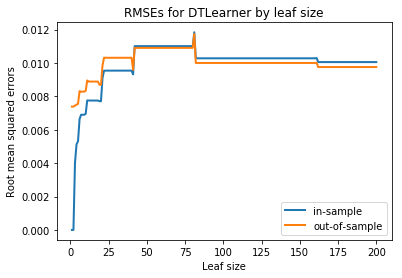

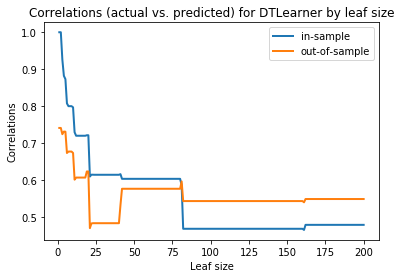

In [5]:
plot_results(RMSEin_mean, RMSEout_mean, "RMSEs for DTLearner by leaf size", 
    "Leaf size", "Root mean squared errors", xaxis_length=max_leaf_size)
plot_results(CORRin_mean, CORRout_mean, "Correlations (actual vs. predicted) for DTLearner by leaf size", 
    "Leaf size", "Correlations", "upper right", max_leaf_size)

Find the first leaf_size where the tree doesn't overfit, i.e. when in-sample error is higher than out-of-sample error

In [6]:
RMSE_in_minus_out = np.subtract(RMSEin_mean, RMSEout_mean)
np.argmax(RMSE_in_minus_out>0)

41

Correlations between predicted and actual results for in-sample/out-of-sample data.

In [8]:
print ("In-sample correlation for leaf_size = 1:", CORRin_mean[1])
print ("In-sample correlation for leaf_size = 50:", CORRin_mean[50])
print ("Out-of-sample correlation for leaf_size = 1:", CORRout_mean[1])
print ("Out-of-sample correlation for leaf_size = 50:", CORRout_mean[50])

In-sample correlation for leaf_size = 1: 1.0
In-sample correlation for leaf_size = 50: 0.603801013823
Out-of-sample correlation for leaf_size = 1: 0.74131632143
Out-of-sample correlation for leaf_size = 50: 0.576945577777


### Understand the results

Overfitting occurs when leaf_size is less than 41. We can see this in the first figure of this section: Between 1 and 40 leaf_size range, the in-sample RMSE is lower than out-of-sample RMSE. 

---
## 2) Train and evaluate a Random Tree Learner <a class="anchor" id="second"></a>

Train and test an RTLearner on various leaf sizes. Then compare the root mean squared errors (RMSEs) between the in-sample (training set) and out-of-sample data (test set) to evaluate where overfitting occurs.

Train the data and retrieve the RMSEs and correlations for in-sample and out-of-sample data.

In [9]:
# Ignore RuntimeWarning caused by scipy.stats.pearsonr
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    RMSEin_mean, RMSEout_mean, CORRin_mean, CORRout_mean = train_test_learner(trainX, trainY, testX, testY,
    rtl.RTLearner, max_leaf_size=max_leaf_size, num_iterations=num_iterations)

Plot the RMSEs and correlations

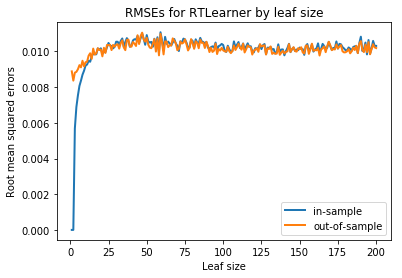

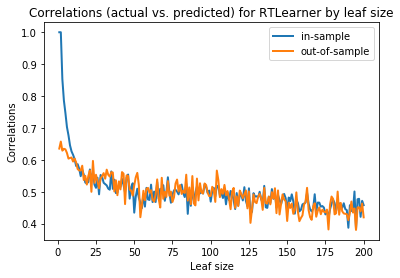

In [10]:
plot_results(RMSEin_mean, RMSEout_mean, "RMSEs for RTLearner by leaf size", 
    "Leaf size", "Root mean squared errors", xaxis_length=max_leaf_size)
plot_results(CORRin_mean, CORRout_mean, "Correlations (actual vs. predicted) for RTLearner by leaf size", 
    "Leaf size", "Correlations", "upper right", max_leaf_size)

Find the first leaf_size where the tree doesn't overfit, i.e. when in-sample error is higher than out-of-sample error

In [11]:
RMSE_in_minus_out = np.subtract(RMSEin_mean, RMSEout_mean)
np.argmax(RMSE_in_minus_out>0)

13

Correlations between predicted and actual results for in-sample/out-of-sample data.

In [12]:
print ("In-sample correlation for leaf_size = 1:", CORRin_mean[1])
print ("In-sample correlation for leaf_size = 50:", CORRin_mean[50])
print ("Out-of-sample correlation for leaf_size = 1:", CORRout_mean[1])
print ("Out-of-sample correlation for leaf_size = 50:", CORRout_mean[50])

In-sample correlation for leaf_size = 1: 1.0
In-sample correlation for leaf_size = 50: 0.484340475894
Out-of-sample correlation for leaf_size = 1: 0.657089758642
Out-of-sample correlation for leaf_size = 50: 0.545164169461


### Understand the results

Overfitting occurs when leaf_size is less than 13. We can see this in the first figure of this section: Between 1 and 12 `leaf_size` range, the in-sample RMSE is lower than out-of-sample RMSE. 

#### _Random tree vs "classic" decision tree:_

Compared to DTLearner, RTLearner is less likely to overfit for smaller leaf sizes. For example, at `leaf_size = 30`, DTLearner overfits but RTLearner does not.


---
## 3) Train and evaluate a Bag Learner <a class="anchor" id="third"></a>

Train and test a Bag Learner on various leaf sizes and on various bag sizes

### 3a) Train and evaluate a Bag Learner by leaf size <a class="anchor" id="thirda"></a>

Train and test a Bag Learner that contains 20 DTLearners on various leaf sizes. Then check for overfitting and compare how it performs vs. a DTLearner and an RTLearner

Train the data and retrieve the RMSEs and correlations for in-sample and out-of-sample data.

In [4]:
# Ignore RuntimeWarning caused by scipy.stats.pearsonr
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    RMSEin_mean, RMSEout_mean, CORRin_mean, CORRout_mean = train_test_learner(trainX, trainY, testX, testY,
    bl.BagLearner, max_leaf_size=max_leaf_size, num_iterations=num_iterations, learner=dtl.DTLearner)

Plot the RMSEs and correlations

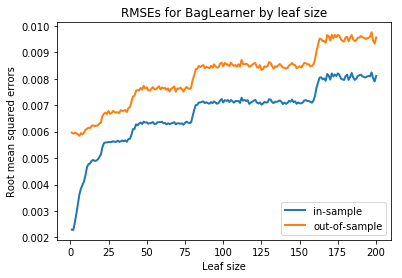

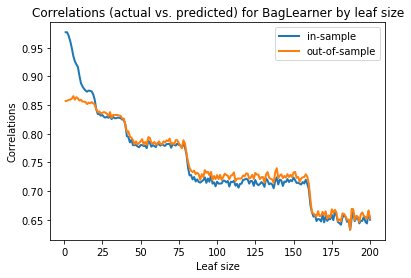

In [6]:
plot_results(RMSEin_mean, RMSEout_mean, "RMSEs for BagLearner by leaf size", 
    "Leaf size", "Root mean squared errors", xaxis_length=max_leaf_size)
plot_results(CORRin_mean, CORRout_mean, "Correlations (actual vs. predicted) for BagLearner by leaf size", 
    "Leaf size", "Correlations", "upper right", max_leaf_size)

Correlations between predicted and actual results for in-sample/out-of-sample data.

In [8]:
print ("In-sample correlation for leaf_size = 1:", CORRin_mean[1])
print ("In-sample correlation for leaf_size = 50:", CORRin_mean[50])
print ("Out-of-sample correlation for leaf_size = 1:", CORRout_mean[1])
print ("Out-of-sample correlation for leaf_size = 50:", CORRout_mean[50])

In-sample correlation for leaf_size = 1: 0.976939042257
In-sample correlation for leaf_size = 50: 0.780161542435
Out-of-sample correlation for leaf_size = 1: 0.857672104978
Out-of-sample correlation for leaf_size = 50: 0.790532981335


### Understand the results

Bagging doesn't seem to reduce overfitting. However, the problem is not serious at all. In-sample and out-of-sample correlations at the same `leaf_size` are very close to each other. Performances are overall better: errors increase more slowly as `leaf_size` increases and correlations at the same leaf sizes are higher than those from a DTLearner or an RTLearner.

---
### 3b) Train and evaluate a Bag Learner by bag size <a class="anchor" id="thirdb"></a>

Train and test a Bag Learner that contains DTLearners with `leaf_size` = 25 on various bag sizes. Then evaluate if variations in bag size impact results.

Train the data and retrieve the RMSEs and correlations for in-sample and out-of-sample data.

In [4]:
max_bag_size = 100

In [5]:
# Ignore RuntimeWarning caused by scipy.stats.pearsonr
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    RMSEin_mean, RMSEout_mean, CORRin_mean, CORRout_mean = train_test_learner(trainX, trainY, testX, testY,
    bl.BagLearner, max_bag_size=max_bag_size, num_iterations=num_iterations, learner=dtl.DTLearner, leaf_size=25)

Plot the RMSEs and correlations

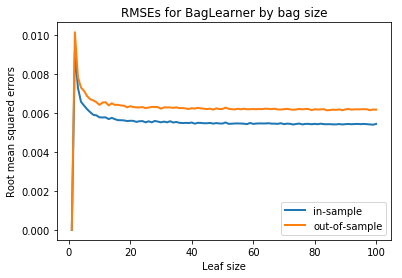

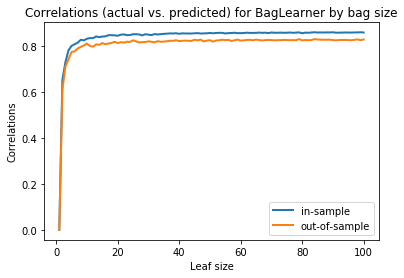

In [6]:
plot_results(RMSEin_mean, RMSEout_mean, "RMSEs for BagLearner by bag size", 
    "Leaf size", "Root mean squared errors", xaxis_length=max_bag_size)
plot_results(CORRin_mean, CORRout_mean, "Correlations (actual vs. predicted) for BagLearner by bag size", 
    "Leaf size", "Correlations", xaxis_length=max_bag_size)

Correlations between predicted and actual results for in-sample/out-of-sample data.

In [7]:
print ("In-sample correlation for bag_size = 1:", CORRin_mean[1])
print ("In-sample correlation for bag_size = 20:", CORRin_mean[20])
print ("In-sample correlation for bag_size = 50:", CORRin_mean[50])
print ("In-sample correlation for bag_size = 99:", CORRin_mean[99])
print ("Out-of-sample correlation for bag_size = 1:", CORRout_mean[1])
print ("Out-of-sample correlation for bag_size = 20:", CORRout_mean[20])
print ("Out-of-sample correlation for bag_size = 50:", CORRout_mean[50])
print ("Out-of-sample correlation for bag_size = 99:", CORRout_mean[99])

In-sample correlation for bag_size = 1: 0.6528178443
In-sample correlation for bag_size = 20: 0.849633439818
In-sample correlation for bag_size = 50: 0.855928450072
In-sample correlation for bag_size = 99: 0.859173180193
Out-of-sample correlation for bag_size = 1: 0.609973968603
Out-of-sample correlation for bag_size = 20: 0.817412638177
Out-of-sample correlation for bag_size = 50: 0.819670753262
Out-of-sample correlation for bag_size = 99: 0.828954041561


### Understand the results

Performance improves significantly as bag size increases from 1 to 20. However, after that an increase in bag size doesn't make any big improvement in performance. Just like in 3a, there is overfitting but the problem is not serious.